In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

from pyomo.environ import *
from pyomo.opt import SolverFactory

sys.path.append("../src")
from game_graph import edges

In [2]:
g = nx.Graph()
for i, cities in enumerate(edges):
    g.add_edge(cities[0], cities[1])

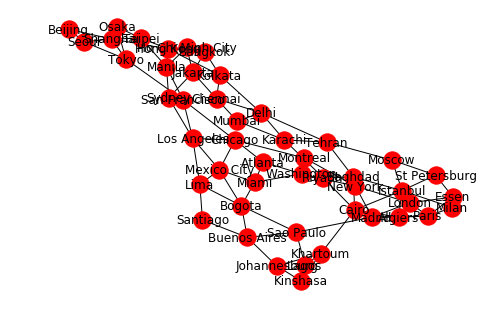

In [3]:
nx.draw(g, with_labels=True)
plt.show()

In [8]:
sorted(nx.betweenness_centrality(g).items(), key=lambda kv: kv[1])

[('Beijing', 0.0),
 ('Kinshasa', 0.00046253469010175765),
 ('Osaka', 0.00046253469010175765),
 ('Milan', 0.005687708324156059),
 ('Ho Chi Minh City', 0.007628885658487879),
 ('Bangkok', 0.009000337723741978),
 ('Mumbai', 0.00948085987401436),
 ('Seoul', 0.010426302806043787),
 ('Atlanta', 0.010942249240121578),
 ('Santiago', 0.012667577052405914),
 ('Miami', 0.02029866525703714),
 ('Taipei', 0.02038750128481858),
 ('St Petersburg', 0.024397970720819947),
 ('Washington', 0.025670675300647552),
 ('Paris', 0.02607153869873574),
 ('Lagos', 0.027831373067265755),
 ('Essen', 0.029287623159038524),
 ('Johannesburg', 0.0376150830359896),
 ('London', 0.046003847113930386),
 ('Riyadh', 0.05342771243557555),
 ('Moscow', 0.05432837026269034),
 ('Baghdad', 0.055261332099907495),
 ('Karachi', 0.05705090084137264),
 ('Shanghai', 0.061749665947168256),
 ('Chennai', 0.06363449480933293),
 ('Buenos Aires', 0.06445237361056047),
 ('Lima', 0.06625809435707679),
 ('Khartoum', 0.06963276213970017),
 ('Istan

In [5]:
nx.shortest_path_length(g, source='Tokyo', target='Tokyo')

0

In [6]:
len(g.nodes)

48

In [18]:
cities = list(g.nodes)
max_facilities = 4

m = ConcreteModel()
m.x = Var(cities, cities, within=Binary)
m.y = Var(cities, within=Binary)

# each city must be assigned to one and only one research facility
def city_assigned_to_research_station(model, city):
    return sum(model.x[possible_facility, city] for possible_facility in cities) == 1
m.each_city_assigned = Constraint(cities, rule=city_assigned_to_research_station)

# can only assign a city to a research station if that station is active
def assign_only_if_active(model, possible_facility, city):
    return m.x[possible_facility, city] <= m.y[possible_facility]
m.active_facilities_only = Constraint(cities, cities, rule=assign_only_if_active)

# limit the number of facilities
m.max_facilities = Constraint(expr = sum(m.y[possible_facility] for possible_facility in cities) <= max_facilities)

# objective function
m.obj = Objective(sense=minimize, expr = sum(nx.shortest_path_length(g, source=possible_facility, target=city) * m.x[possible_facility, city] for possible_facility in cities for city in cities))

solver = SolverFactory('cbc')

## tee=True enables solver output
results = solver.solve(m, tee=False)

In [19]:
placements = {city: m.y[city].value for city in cities}
sorted(placements.items(), key=lambda kv: kv[1], reverse=True)

[('Chicago', 1.0),
 ('Sao Paulo', 1.0),
 ('Istanbul', 1.0),
 ('Hong Kong', 1.0),
 ('Atlanta', 0.0),
 ('Washington', 0.0),
 ('Miami', 0.0),
 ('San Francisco', 0.0),
 ('Los Angeles', 0.0),
 ('Montreal', 0.0),
 ('Mexico City', 0.0),
 ('New York', 0.0),
 ('Sydney', 0.0),
 ('Lima', 0.0),
 ('Manila', 0.0),
 ('Tokyo', 0.0),
 ('Bogota', 0.0),
 ('Buenos Aires', 0.0),
 ('Santiago', 0.0),
 ('Lagos', 0.0),
 ('Madrid', 0.0),
 ('Johannesburg', 0.0),
 ('London', 0.0),
 ('Paris', 0.0),
 ('Essen', 0.0),
 ('Algiers', 0.0),
 ('Milan', 0.0),
 ('St Petersburg', 0.0),
 ('Moscow', 0.0),
 ('Cairo', 0.0),
 ('Baghdad', 0.0),
 ('Riyadh', 0.0),
 ('Khartoum', 0.0),
 ('Kinshasa', 0.0),
 ('Tehran', 0.0),
 ('Karachi', 0.0),
 ('Delhi', 0.0),
 ('Mumbai', 0.0),
 ('Kolkata', 0.0),
 ('Chennai', 0.0),
 ('Bangkok', 0.0),
 ('Jakarta', 0.0),
 ('Ho Chi Minh City', 0.0),
 ('Beijing', 0.0),
 ('Seoul', 0.0),
 ('Shanghai', 0.0),
 ('Taipei', 0.0),
 ('Osaka', 0.0)]